In [42]:
import pandas as pd 
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from conf import lendo_dataset
import matplotlib.pyplot as plt

In [2]:
stop = stopwords.words("portuguese")
dataset_train_1 = pd.read_csv('train_1.csv', delimiter=',', )


In [3]:
dataset_train_1['texto'] = dataset_train_1['texto'].astype(str)
dataset_train_1['texto'] = dataset_train_1['texto'].str.lower().str.split()

dataset_train_1['texto'] = dataset_train_1['texto'].apply(lambda x: ' '.join([item for item in x if item not in stop]))

In [4]:
order_review = lendo_dataset('order_reviews')
order_review = order_review.dropna(subset=['review_comment_message'])


In [5]:
order_review['review_comment_message'] = order_review['review_comment_message'].astype(str)
order_review['review_comment_message'] = order_review['review_comment_message'].str.lower().str.split()

order_review['review_comment_message'] = order_review['review_comment_message'].apply(lambda x: ' '.join([item for item in x if item not in stop]))

In [6]:
order_review['review_comment_message']

3                       recebi bem antes prazo estipulado.
4        parabéns lojas lannister adorei comprar intern...
9        aparelho eficiente. site marca aparelho impres...
12                    pouco ,travando...pelo valor ta boa.
15       vendedor confiável, produto ok entrega antes p...
                               ...                        
99983    entregou dentro prazo. produto chegou condiçõe...
99990    produto enviado nf, existe venda nf, certeza f...
99996    excelente mochila, entrega super rápida. super...
99998    solicitei compra capa retrovisor celta/prisma/...
99999    produto chegou ja devolver, pois defeito , seg...
Name: review_comment_message, Length: 41754, dtype: object

In [7]:
dataset_train_1 = dataset_train_1.dropna(subset=['rotulo'])

In [8]:
comments= dataset_train_1["texto"].values
notes = dataset_train_1['rotulo'].values

In [9]:
comments_order_review = order_review['review_comment_message'].values

In [10]:
y = dataset_train_1["rotulo"]

In [11]:
vectorizer= CountVectorizer(analyzer="word")


In [12]:
vectorizer.fit(comments)
freq_comments = vectorizer.transform(comments)

In [13]:
freq_comments_order = vectorizer.transform(comments_order_review)

In [14]:
xTrain, xTest, yTrain, yTest = train_test_split(freq_comments, y, test_size = 0.2, random_state = 0)

In [15]:
modelo = MultinomialNB()
modelo = modelo.fit(xTrain,yTrain)

In [16]:
y_predict = modelo.predict(xTest)

In [20]:
tedy = modelo.predict(freq_comments_order)

In [18]:
from sklearn.metrics import f1_score

In [19]:
f1 = f1_score(y_predict, yTest, average='weighted')
print(f1)

0.8103019979203893


In [29]:
tedy

array([ 1.,  1., -1., ...,  1., -1., -1.])

In [32]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

frequencia = FreqDist(comments_order_review)

In [33]:
frequencia

FreqDist({'bom': 825, 'recomendo': 254, 'otimo': 230, 'ótimo': 200, 'excelente': 160, 'ok': 150, 'gostei': 122, 'boa': 117, 'tudo ok': 94, 'bom produto': 90, ...})

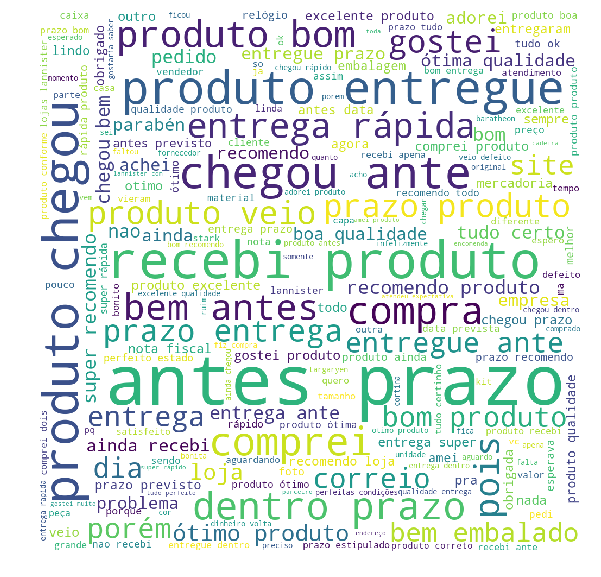

In [45]:
comment_words = '' 
for val in order_review['review_comment_message']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                stopwords = stop, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

In [ ]:
order_review['review_comment_message']